In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#from model_training import *
import yaml
from benchmark import *
import pandas as pd
from new_etl import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import joblib

In [3]:
data = {
    
}
class data_test:
    def __init__(self, path):
        self.etl = covid_etl(path)
        self.df = self.etl.do()
        self.df_x = self.df[["total_cases", "new_cases", "total_deaths",
       "reproduction_rate", "total_tests", "new_tests", "positive_rate",
       "tests_per_case", 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'year', 'month', 'day']]
        self.df_y = self.df[['new_deaths']]
    def split_data(self):
        x_train, x_test, y_train, y_test = train_test_split(self.df_x, self.df_y, test_size=0.3, random_state=66)
        return x_train, x_test, y_train, y_test
    def scaled_data(self):
        x_train, x_test, y_train, y_test = self.split_data()
        scaler_x = StandardScaler()
        scaler_y = StandardScaler()
        x_train = scaler_x.fit_transform(x_train)
        x_test = scaler_x.transform(x_test)
        
        y_train = scaler_y.fit_transform(y_train)
        y_test = scaler_y.transform(y_test)
        joblib.dump(scaler_x, 'scalerX.pkl')
        joblib.dump(scaler_y, 'scalerY.pkl')
        return x_train, x_test, y_train, y_test, scaler_y

In [4]:
with open('regression-training-ex-1.yaml', 'r') as yaml_file:
    cfg = yaml.load(yaml_file)

<ipython-input-4-51a61f71400a>:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(yaml_file)


In [5]:
r2_scores = list()
mse_scores = list()
mae_scores = list()

In [6]:
dt = data_test('/usr/src/covid_prediction/our-world-in-data-covid19-dataset/owid-covid-data.csv')
x_train, x_test, y_train, y_test, scaler_y = dt.scaled_data()

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'total_tests', 'new_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'year', 'month', 'day'],
      dtype='object')


In [7]:
trainer_rf = training(cfg, 'RandomForestRegressor')
rf = trainer_rf.run()
data['rf'] = rf.score(x_test, y_test)
r2_scores.append(r2_score(y_test, rf.predict(x_test)))
mae_scores.append(mean_absolute_error(y_test, rf.predict(x_test)))
mse_scores.append(mean_squared_error(y_test, rf.predict(x_test)))
joblib.dump(rf, 'model.pkl')

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'total_tests', 'new_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'year', 'month', 'day'],
      dtype='object')


/usr/src/covid_prediction/benchmark.py:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(x_train, y_train)


['model.pkl']

In [8]:
trainer_svr = training(cfg, 'SVR')
svr = trainer_svr.run()
data['svr'] = svr.score(x_test, y_test)
r2_scores.append(r2_score(y_test, svr.predict(x_test)))
mae_scores.append(mean_absolute_error(y_test, svr.predict(x_test)))
mse_scores.append(mean_squared_error(y_test, svr.predict(x_test)))

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'total_tests', 'new_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'year', 'month', 'day'],
      dtype='object')


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [9]:
trainer_xgb = training(cfg, 'XG')
xgb = trainer_xgb.run()
data['xgb'] = xgb.score(x_test, y_test)
r2_scores.append(r2_score(y_test, xgb.predict(x_test)))
mae_scores.append(mean_absolute_error(y_test, xgb.predict(x_test)))
mse_scores.append(mean_squared_error(y_test, xgb.predict(x_test)))

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'total_tests', 'new_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'year', 'month', 'day'],
      dtype='object')


In [10]:
x_test

array([[-0.7075755 , -0.66083105, -0.75703737, ..., -1.07224088,
        -0.8964932 ,  0.00755607],
       [ 2.083333  ,  0.63229104,  1.7767689 , ...,  1.558536  ,
        -0.30302729, -1.35253679],
       [-0.45269844,  0.74322988, -0.47265473, ...,  0.24314756,
         0.29043862,  0.12089714],
       ...,
       [-0.62762176, -0.17907147, -0.69259253, ...,  0.24314756,
        -0.30302729,  0.57426143],
       [-0.64666199,  0.0173769 , -0.71164502, ...,  0.24314756,
        -0.30302729, -0.33246714],
       [-0.58206428, -0.20757464, -0.63148406, ...,  0.24314756,
        -0.00629434, -0.44580822]])

In [11]:
trainer_gbr = training(cfg, 'GBR')
gbr = trainer_gbr.run()
data['gbr'] = gbr.score(x_test, y_test)
r2_scores.append(r2_score(y_test, gbr.predict(x_test)))
mae_scores.append(mean_absolute_error(y_test, gbr.predict(x_test)))
mse_scores.append(mean_squared_error(y_test, gbr.predict(x_test)))

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'total_tests', 'new_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'year', 'month', 'day'],
      dtype='object')


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [12]:
df = pd.DataFrame(
    {
        'model' : list(data.keys()),
        'score' : list(data.values()),
        'r2' : r2_scores,
        'mae': mae_scores,
        'mse': mse_scores
    }
)

In [13]:
df = df.sort_values(by=['score'], ascending=False)
df = df.reset_index()

<AxesSubplot:xlabel='model', ylabel='score'>

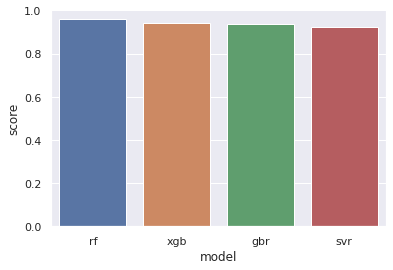

In [14]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.barplot(x='model', y='score', data=df)

In [15]:
df

,index,model,score,r2,mae,mse
0,0,rf,0.958734,0.958734,0.095916,0.039702
1,2,xgb,0.940920,0.940920,0.108108,0.056840
2,3,gbr,0.938808,0.938808,0.113633,0.058872
3,1,svr,0.920549,0.920549,0.150277,0.076439


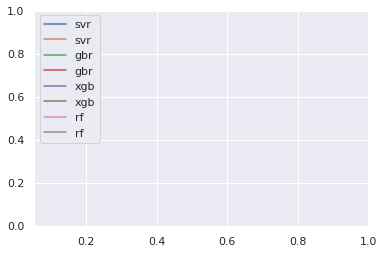

In [16]:
def linesplot(df):
    model_set = set(df['model'])
    plt.figure()
    for model in model_set:
        selected_data = df.loc[df['model'] == model]
        plt.plot(selected_data['score'], selected_data['r2'], selected_data['mae'], selected_data['mse'], label=model)
    plt.legend()
    plt.show()
    
linesplot(df)